<div id="teaser" style=' background-position:  right center; background-size: 00px; background-repeat: no-repeat; 
    padding-top: 20px;
    padding-right: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    border-bottom: 14px double #333;
    border-top: 14px double #333;' > 

   
   <div style="text-align:center">
    <b><font size="6.4">Compressed sensing for identifying materials descriptors</font></b>    
  </div>
    





# Import required modules

In [2]:
import pandas as pd
import numpy as np
import scipy
import sklearn 
import xgboost
import statistics

import math
import random 
import re
import itertools

from collections import Counter 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom_test,norm
import scipy.stats as ss

from functools import partial

from sklearn import svm

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures as plf
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

from sklearn.svm import SVR
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import linear_model
from xgboost import XGBRegressor

from math import exp, sqrt
from itertools import combinations

import warnings

# set display options for the notebook 
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Get the data

In [3]:
df= pd.read_csv('./project_data/WGS_Catalyst_Data_4316_Mpct_Descriptors.csv')
df=df.drop(['Total # of Data'], axis=1)
df.head()

,Pt,Au,Ru,Rh,Ir,Cu,Pd,IWI,WI,CI,SI,SGP,CP,HDP,UGC,SCT,FSP,ME,DP,Calc T (oC),Calc T. (hr),Al2O3,MgO,CeO2,TiO2,ZEO,MnO,Y2O3,ZrO2,HAP,ACC,Tb4O7,HfO2,La2O3,Co3O4,ThO2,SiO2,Fe2O3,Sm2O3,Gd2O3,Yb2O3,CaO,YSZ,Li,Ce,Co,Mg,Fe,Mn,Zr,K,Ni,Ca,Cs,V,Rb,Y,Na,La,Gd,Yb,Zn,Re,Ti,Cr,Ho,Nd,Tm,Sm,Er,Sr,Temperature (C),H2 vol.%,O2 vol.%,CO vol.%,H2O vol.%,CO2 vol.%,CH4 vol.%,TOS (min),F/W (mg.min/ml),Metal_Radius_Kittel,Metal_EN_Allen,Metal_Atomic_Num,Metal_T_melt,Metal_VE_Villars,Metal_Atomic_Wt,Metal_Group,Metal_Period,Metal_Density,Metal_T_boiling,Promo_Radius_Kittel,Promo_EN_Allen,Promo_Atomic_Num,Promo_T_melt,Promo_VE_Villars,Promo_Atomic_Wt,Promo_Group,Promo_Period,Promo_Density,Promo_T_boiling,CO_Conversion
0,0.0,0.874927,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0.0,99.125073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,1.44,1.92,79.0,1337.58,11.0,196.966569,11.0,6.0,19.282,3129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.6
1,0.0,2.631431,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0.0,97.368569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,1.44,1.92,79.0,1337.58,11.0,196.966569,11.0,6.0,19.282,3129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1
2,0.0,4.396856,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0.0,95.603144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,1.44,1.92,79.0,1337.58,11.0,196.966569,11.0,6.0,19.282,3129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,0.0,0.874927,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0.0,99.125073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,1.44,1.92,79.0,1337.58,11.0,196.966569,11.0,6.0,19.282,3129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.2
4,0.0,2.631431,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,25,0.0,0.0,0.0,97.368569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0,4.498,30.6,0.0,0.0,60.0,2.0,1.44,1.92,79.0,1337.58,11.0,196.966569,11.0,6.0,19.282,3129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.3


# Split into groups

In [4]:
df_density= df[['Metal_Density','Promo_Density']]
col_density= df_density.columns.tolist() 
print('col_density: {0}\n'.format(col_density))

df_ve= df[['Metal_VE_Villars','Promo_VE_Villars']]
col_ve= df_ve.columns.tolist() 
print('col_ve: {0}\n'.format(col_ve))

df_en= df[['Metal_EN_Allen','Promo_EN_Allen']]
col_en= df_en.columns.tolist() 
print('col_en: {0}\n'.format(col_en))

df_number= df[['Metal_Atomic_Num','Metal_Atomic_Wt','Metal_Group','Metal_Period',
              'Promo_Atomic_Num','Promo_Atomic_Wt','Promo_Group','Promo_Period' ]]
col_number= df_en.columns.tolist() 
print('col_number: {0}\n'.format(col_number))

df_r= df[['Metal_Radius_Kittel','Promo_Radius_Kittel']]
col_r= df_r.columns.tolist() 
print('col_r: {0}\n'.format(col_r))

df_others= df[['YSZ','F/W (mg.min/ml)']]
col_others= df_others.columns.tolist() 
print('col_others: {0}\n'.format(col_others))


df_basemetal=df.loc[:, 'Pt':'Pd']
col_basemetal= df_basemetal.columns.tolist() 
print('col_basemetal (wt%): {0}\n'.format(col_basemetal))

df_promoter= df.loc[:, 'Li':'Sr']
col_promoter=df_promoter.columns.tolist() 
print('col_promoter(wt%): {0}\n'.format(col_promoter))


df_catalystprep= df.loc[:, 'IWI':'DP']
col_catalystprep=df_catalystprep.columns.tolist() 
print('col_catalystprep (1/0): {0}\n'.format(col_catalystprep))

df_support= df.loc[:, 'Al2O3':'CaO']
col_support=df_support.columns.tolist() 
print('col_support: {0}\n'.format(col_support))


df_operatingvol= df.loc[:, 'H2 vol.%':'CH4 vol.%']
col_operatingvol=df_operatingvol.columns.tolist() 
print('col_operatingvol(vol%): {0}\n'.format(col_operatingvol))

df_temp= df[['Calc T (oC)','Temperature (C)','Metal_T_melt','Metal_T_boiling','Promo_T_boiling']]
col_temp=df_temp.columns.tolist() 
print('col_temp(C): {0}\n'.format(col_temp))

df["Calc T. (min)"] = 60 * df["Calc T. (hr)"]
df_time= df[['TOS (min)','Calc T. (min)']]
col_time=df_time.columns.tolist() 
print('col_time(min): {0}\n'.format(col_time))

col_density: ['Metal_Density', 'Promo_Density']

col_ve: ['Metal_VE_Villars', 'Promo_VE_Villars']

col_en: ['Metal_EN_Allen', 'Promo_EN_Allen']

col_number: ['Metal_EN_Allen', 'Promo_EN_Allen']

col_r: ['Metal_Radius_Kittel', 'Promo_Radius_Kittel']

col_others: ['YSZ', 'F/W (mg.min/ml)']

col_basemetal (wt%): ['Pt', 'Au', 'Ru', 'Rh', 'Ir', 'Cu', 'Pd']

col_promoter(wt%): ['Li', 'Ce', 'Co', 'Mg', 'Fe', 'Mn', 'Zr', 'K', 'Ni', 'Ca', 'Cs', 'V', 'Rb', 'Y', 'Na', 'La', 'Gd', 'Yb', 'Zn', 'Re', 'Ti', 'Cr', 'Ho', 'Nd', 'Tm', 'Sm', 'Er', 'Sr']

col_catalystprep (1/0): ['IWI', 'WI', 'CI', 'SI', 'SGP', 'CP', 'HDP', 'UGC', 'SCT', 'FSP', 'ME', 'DP']

col_support: ['Al2O3', 'MgO', 'CeO2', 'TiO2', 'ZEO', 'MnO', 'Y2O3', 'ZrO2', 'HAP', 'ACC', 'Tb4O7', 'HfO2', 'La2O3', 'Co3O4', 'ThO2', 'SiO2', 'Fe2O3', 'Sm2O3', 'Gd2O3', 'Yb2O3', 'CaO']

col_operatingvol(vol%): ['H2 vol.%', 'O2 vol.%', 'CO vol.%', 'H2O vol.%', 'CO2 vol.%', 'CH4 vol.%']

col_temp(C): ['Calc T (oC)', 'Temperature (C)', 'Metal_T_melt', 'Meta

# Generate features


In [5]:
def _my_power_2(row):
    return pow(row[0], 2)         

def _my_power_3(row):
    return pow(row[0], 3)    

def _my_power_m1(row):
    return pow(row[0],-1)

def _my_power_m2(row):
    return pow(row[0],-2)

def _my_power_m3(row):
    return pow(row[0],-3)

def _my_abs_sqrt(row):
    return math.sqrtabs(abs(row[0]))
    
def _my_exp(row):
    return exp(row[0])

def _my_exp_power_2(row):
    return exp(pow(row[0], 2))

def _my_exp_power_3(row):
    return exp(pow(row[0], 3))

def _my_sum(row):
    return row[0] + row[1]
    
def _my_abs_sum(row):
    return abs(row[0] + row[1])

def _my_abs_diff(row):
    return abs(row[0] - row[1])   

def _my_diff(row):
    return row[0] - row[1] 

def _my_div(row):
    return row[0]/row[1]
    
def _my_sum_power_2(row):
    return pow((row[0] + row[1]), 2)

def _my_sum_power_3(row):
    return pow((row[0] + row[1]), 3)
    
def _my_sum_exp(row):
    return exp(row[0] + row[1])

def _my_sum_exp_power_2(row):
    return exp(pow(row[0] + row[1], 2))

def _my_sum_exp_power_3(row):
    return exp(pow(row[0] + row[1], 3))
  
def combine_features(df=None, allowed_operations=None, is_print=True):
    
    if is_print:
        if allowed_operations:
            print('Selected operations:\n {0}'.format(allowed_operations)) 
        else:
            print('No allowed operations selected.')
    
    '''
    col_basemetal,col_promoter,
    col_catalystprep,col_support,
    col_operatingvol,
    col_temp, col_time,col_density,col_ve,col_en,col_number
    col_r, col_others
    '''
    
    columns_ = df.columns.tolist() 
            
    #get df
    df_a0 = df[[col for col in columns_ if col in col_others or col in col_catalystprep ]]    
    df_a1 = df[[col for col in columns_ if col in col_support]]
    df_a2 = df[[col for col in columns_ if col in col_temp]]   
    df_a3 = df[[col for col in columns_ if col in col_time]]
    df_a4 = df[[col for col in columns_ if col in col_operatingvol]]
    df_a5 = df[[col for col in columns_ if col in col_density]]
    df_a6 = df[[col for col in columns_ if col in col_ve]]
    df_a7 = df[[col for col in columns_ if col in col_en]]
    df_a8 = df[[col for col in columns_ if col in col_number]]
    df_a9 = df[[col for col in columns_ if col in col_r]]
    df_a10 = df[[col for col in columns_ if col in col_basemetal or col in col_promoter]]
    
    
    #print(df_a1)
    #Get column names
    col_a0 = df_a0.columns.tolist()
    col_a1 = df_a1.columns.tolist()
    col_a2 = df_a2.columns.tolist()
    col_a3 = df_a3.columns.tolist()
    col_a4 = df_a4.columns.tolist()
    col_a5 = df_a5.columns.tolist()
    col_a6 = df_a6.columns.tolist()
    col_a7 = df_a7.columns.tolist()
    col_a8 = df_a8.columns.tolist()
    col_a9 = df_a9.columns.tolist() #
    col_a10 = df_a10.columns.tolist()
    
   
    
    #  this list will at the end all the dataframes created
    df_list = []
    df_b0_list = []    
    df_b1_list = []
    df_b2_list = []
    df_b3_list = []
    df_b4_list = []
    df_b5_list = []
    df_b6_list = []
    df_b7_list = []
    df_b8_list = []
    df_b9_list = []
    df_b10_list = []
     
    # others
    '''
    for subset in itertools.combinations(col_a0, 1):
        if '^2' in allowed_operations:
            cols = [subset[0]+'^2']        
            data = df_a0[list(subset)].apply(_my_power_2, axis=1)            
            df_b0_list.append(pd.DataFrame(data, columns=cols))    
            
        if '^3' in allowed_operations:
            cols = [subset[0]+'^3']   
            data = df_a0[list(subset)].apply(_my_power_3, axis=1)            
            df_b0_list.append(pd.DataFrame(data, columns=cols)) 

        if 'exp' in allowed_operations:
            cols = ['exp('+subset[0]+')']       
            data = df_a0[list(subset)].apply(_my_exp, axis=1)            
            df_b0_list.append(pd.DataFrame(data, columns=cols))
    '''      
    
   
    for subset in itertools.combinations(col_a1, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a1[list(subset)].apply(_my_sum, axis=1)            
            df_b1_list.append(pd.DataFrame(data, columns=cols))         
            
            
    for subset in itertools.combinations(col_a2, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a2[list(subset)].apply(_my_sum, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a2[list(subset)].apply(_my_diff, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a2[list(subset)].apply(_my_diff, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a2[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))    
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a2[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a2[list(subset)].apply(_my_div, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols)) 

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a2[list(subset)].apply(_my_div, axis=1)            
            df_b2_list.append(pd.DataFrame(data, columns=cols))
    for subset in itertools.combinations(col_a3, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a3[list(subset)].apply(_my_sum, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a3[list(subset)].apply(_my_diff, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a3[list(subset)].apply(_my_diff, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a3[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a3[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a3[list(subset)].apply(_my_div, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a3[list(subset)].apply(_my_div, axis=1)            
            df_b3_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a4, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a4[list(subset)].apply(_my_sum, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a4[list(subset)].apply(_my_diff, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a4[list(subset)].apply(_my_diff, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a4[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a4[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a4[list(subset)].apply(_my_div, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a4[list(subset)].apply(_my_div, axis=1)            
            df_b4_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a5, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a5[list(subset)].apply(_my_sum, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a5[list(subset)].apply(_my_diff, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a5[list(subset)].apply(_my_diff, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a5[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a5[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a5[list(subset)].apply(_my_div, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a5[list(subset)].apply(_my_div, axis=1)            
            df_b5_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a6, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a6[list(subset)].apply(_my_sum, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a6[list(subset)].apply(_my_diff, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a6[list(subset)].apply(_my_diff, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a6[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a6[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a6[list(subset)].apply(_my_div, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a6[list(subset)].apply(_my_div, axis=1)            
            df_b6_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a7, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a7[list(subset)].apply(_my_sum, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a7[list(subset)].apply(_my_diff, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a7[list(subset)].apply(_my_diff, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a7[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a7[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a7[list(subset)].apply(_my_div, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a7[list(subset)].apply(_my_div, axis=1)            
            df_b7_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a8, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a8[list(subset)].apply(_my_sum, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a8[list(subset)].apply(_my_diff, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a8[list(subset)].apply(_my_diff, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a8[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a8[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols)) 
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a8[list(subset)].apply(_my_div, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a8[list(subset)].apply(_my_div, axis=1)            
            df_b8_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a9, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a9[list(subset)].apply(_my_sum, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a9[list(subset)].apply(_my_diff, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a9[list(subset)].apply(_my_diff, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a9[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a9[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))  
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a9[list(subset)].apply(_my_div, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a9[list(subset)].apply(_my_div, axis=1)            
            df_b9_list.append(pd.DataFrame(data, columns=cols))
            
    for subset in itertools.combinations(col_a10, 2):
        if '+' in allowed_operations:
            cols = ['('+subset[0]+'+'+subset[1]+')']        
            data = df_a10[list(subset)].apply(_my_sum, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols))         
            
        if '-' in allowed_operations:
            cols = ['('+subset[0]+'-'+subset[1]+')']        
            data = df_a10[list(subset)].apply(_my_diff, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols))   
            
            cols = ['('+subset[1]+'-'+subset[0]+')']        
            data = df_a10[list(subset)].apply(_my_diff, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols))  
        
        if '|+|' in allowed_operations:
            cols = ['|'+subset[0]+'+'+subset[1]+'|']        
            data = df_a10[list(subset)].apply(_my_abs_sum, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols))     
        
        if '|-|' in allowed_operations:
            cols = ['|'+subset[0]+'-'+subset[1]+'|']        
            data = df_a10[list(subset)].apply(_my_abs_diff, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols)) 
            
        if '/' in allowed_operations:
            cols = [subset[0]+'/'+subset[1]]        
            data = df_a10[list(subset)].apply(_my_div, axis=1)            
            df_b0_list.append(pd.DataFrame(data, columns=cols))  

            cols = [subset[1]+'/'+subset[0]]        
            data = df_a10[list(subset)].apply(_my_div, axis=1)            
            df_b10_list.append(pd.DataFrame(data, columns=cols))
    

    # make dataframes from lists, check if they are not empty
    # we make there here because they are going to be used to further
    # combine the features
    if not df_a0.empty: 
        df_list.append(df_a0)   
    if not df_a1.empty: 
        df_list.append(df_a1)
    if not df_a2.empty: 
        df_list.append(df_a2)
    if not df_a3.empty: 
        df_list.append(df_a3)
    if not df_a4.empty: 
        df_list.append(df_a4)   
    if not df_a5.empty: 
        df_list.append(df_a5)
    if not df_a6.empty: 
        df_list.append(df_a6)
    if not df_a7.empty: 
        df_list.append(df_a7)
    if not df_a8.empty: 
        df_list.append(df_a8)   
    if not df_a9.empty: 
        df_list.append(df_a9)
    if not df_a10.empty: 
        df_list.append(df_a10)
    

    if df_b0_list: 
        df_b0 = pd.concat(df_b0_list, axis=1)
        col_b0 = df_b0.columns.tolist()
        df_list.append(df_b0)
    if df_b1_list: 
        df_b1 = pd.concat(df_b1_list, axis=1)
        col_b1 = df_b1.columns.tolist()
        df_list.append(df_b1)
    if df_b2_list: 
        df_b2 = pd.concat(df_b2_list, axis=1)
        col_b2 = df_b2.columns.tolist()
        df_list.append(df_b2)
    if df_b3_list: 
        df_b3 = pd.concat(df_b3_list, axis=1)
        col_b3 = df_b3.columns.tolist()
        df_list.append(df_b3)
    if df_b4_list: 
        df_b4 = pd.concat(df_b4_list, axis=1)
        col_b4 = df_b4.columns.tolist()
        df_list.append(df_b4)
    if df_b5_list: 
        df_b5 = pd.concat(df_b5_list, axis=1)
        col_b5 = df_b5.columns.tolist()
        df_list.append(df_b5)
    if df_b6_list: 
        df_b6 = pd.concat(df_b6_list, axis=1)
        col_b6 = df_b6.columns.tolist()
        df_list.append(df_b6)
    if df_b7_list: 
        df_b7 = pd.concat(df_b7_list, axis=1)
        col_b7 = df_b7.columns.tolist()
        df_list.append(df_b7)
    if df_b8_list: 
        df_b8 = pd.concat(df_b8_list, axis=1)
        col_b8 = df_b8.columns.tolist()
        df_list.append(df_b8)
    if df_b9_list: 
        df_b9 = pd.concat(df_b9_list, axis=1)
        col_b9 = df_b9.columns.tolist()
        df_list.append(df_b9)
    if df_b10_list: 
        df_b10 = pd.concat(df_b10_list, axis=1)
        col_b10 = df_b10.columns.tolist()
        df_list.append(df_b10)
        
    print(df_list)
    
    if df_list:
        df_combined_features = pd.concat(df_list, axis=1)
    elif is_print:
        print('No features selected. Please select at least two primary features.')
        

    if is_print:
        print('Number of total features generated: {0}'.format(df_combined_features.shape[1]))
    
    return df_combined_features

In [6]:

def get_data(selected_feature_list, allowed_operations):
    
    P = df['CO_Conversion'].values
    df_features = df[selected_feature_list]
    df_combined = combine_features(df=df_features, allowed_operations=allowed_operations)
    return P,df_combined

In [7]:
# allowed_operations = ['+', '-', '|-|', '/']
selected_feature_list =  df.columns.tolist() 
allowed_operations = ['+', '-', '|-|', '/']
P,df_D = get_data(selected_feature_list, allowed_operations)
D = df_D.values
features_list = df_D.columns.tolist()

Selected operations:
 ['+', '-', '|-|', '/']
[      IWI  WI  CI  SI  SGP  CP  HDP  UGC  SCT  FSP  ME  DP  YSZ  \
0       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
1       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
2       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
3       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
4       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
5       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
6       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
7       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
8       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
9       0   0   0   0    0   0    0    0    0    0   0   1  0.0   
10      0   0   0   0    0   0    0    0    0    0   0   1  0.0   
11      0   0   0   0    0   0    0    0    0    0   0   1  0.0   
12      0   0   0   0    0   0    0    0    0    0   0   1  0.0   
13      0   0   

Number of total features generated: 4059


In [8]:
print(df_D.shape)
df_D

(4295, 4059)


,IWI,WI,CI,SI,SGP,CP,HDP,UGC,SCT,FSP,ME,DP,YSZ,F/W (mg.min/ml),Al2O3,MgO,CeO2,TiO2,ZEO,MnO,Y2O3,ZrO2,HAP,ACC,Tb4O7,HfO2,La2O3,Co3O4,ThO2,SiO2,Fe2O3,Sm2O3,Gd2O3,Yb2O3,CaO,Calc T (oC),Temperature (C),Metal_T_melt,Metal_T_boiling,Promo_T_boiling,TOS (min),Calc T. (min),H2 vol.%,O2 vol.%,CO vol.%,H2O vol.%,CO2 vol.%,CH4 vol.%,Metal_Density,Promo_Density,Metal_VE_Villars,Promo_VE_Villars,Metal_EN_Allen,Promo_EN_Allen,Metal_EN_Allen,Promo_EN_Allen,Metal_Radius_Kittel,Promo_Radius_Kittel,Pt,Au,Ru,Rh,Ir,Cu,Pd,Li,Ce,Co,Mg,Fe,Mn,Zr,K,Ni,Ca,Cs,V,Rb,Y,Na,La,Gd,Yb,Zn,Re,Ti,Cr,Ho,Nd,Tm,Sm,Er,Sr,Pt/Au,Pt/Ru,Pt/Rh,Pt/Ir,Pt/Cu,Pt/Pd,Pt/Li,Pt/Ce,Pt/Co,Pt/Mg,Pt/Fe,Pt/Mn,Pt/Zr,Pt/K,Pt/Ni,Pt/Ca,Pt/Cs,Pt/V,Pt/Rb,Pt/Y,Pt/Na,Pt/La,Pt/Gd,Pt/Yb,Pt/Zn,Pt/Re,Pt/Ti,Pt/Cr,Pt/Ho,Pt/Nd,Pt/Tm,Pt/Sm,Pt/Er,Pt/Sr,Au/Ru,Au/Rh,Au/Ir,Au/Cu,Au/Pd,Au/Li,Au/Ce,Au/Co,Au/Mg,Au/Fe,Au/Mn,Au/Zr,Au/K,Au/Ni,Au/Ca,Au/Cs,Au/V,Au/Rb,Au/Y,Au/Na,Au/La,Au/Gd,Au/Yb,Au/Zn,Au/Re,Au/Ti,Au/Cr,Au/Ho,Au/Nd,Au/Tm,Au/Sm,Au/Er,Au/Sr,Ru/Rh,Ru/Ir,Ru/Cu,Ru/Pd,Ru/Li,Ru/Ce,Ru/Co,Ru/Mg,Ru/Fe,Ru/Mn,Ru/Zr,Ru/K,Ru/Ni,Ru/Ca,Ru/Cs,Ru/V,Ru/Rb,Ru/Y,Ru/Na,Ru/La,Ru/Gd,Ru/Yb,Ru/Zn,Ru/Re,Ru/Ti,Ru/Cr,Ru/Ho,Ru/Nd,Ru/Tm,Ru/Sm,Ru/Er,Ru/Sr,Rh/Ir,Rh/Cu,Rh/Pd,Rh/Li,Rh/Ce,Rh/Co,Rh/Mg,Rh/Fe,Rh/Mn,Rh/Zr,Rh/K,Rh/Ni,Rh/Ca,Rh/Cs,Rh/V,Rh/Rb,Rh/Y,Rh/Na,Rh/La,Rh/Gd,Rh/Yb,Rh/Zn,Rh/Re,Rh/Ti,Rh/Cr,Rh/Ho,Rh/Nd,Rh/Tm,Rh/Sm,Rh/Er,Rh/Sr,Ir/Cu,Ir/Pd,Ir/Li,Ir/Ce,Ir/Co,Ir/Mg,Ir/Fe,Ir/Mn,Ir/Zr,Ir/K,Ir/Ni,Ir/Ca,Ir/Cs,Ir/V,Ir/Rb,Ir/Y,Ir/Na,Ir/La,Ir/Gd,Ir/Yb,Ir/Zn,Ir/Re,Ir/Ti,Ir/Cr,Ir/Ho,Ir/Nd,Ir/Tm,...,(Yb+Nd),(Yb-Nd),(Nd-Yb),|Yb-Nd|,Nd/Yb,(Yb+Tm),(Yb-Tm),(Tm-Yb),|Yb-Tm|,Tm/Yb,(Yb+Sm),(Yb-Sm),(Sm-Yb),|Yb-Sm|,Sm/Yb,(Yb+Er),(Yb-Er),(Er-Yb),|Yb-Er|,Er/Yb,(Yb+Sr),(Yb-Sr),(Sr-Yb),|Yb-Sr|,Sr/Yb,(Zn+Re),(Zn-Re),(Re-Zn),|Zn-Re|,Re/Zn,(Zn+Ti),(Zn-Ti),(Ti-Zn),|Zn-Ti|,Ti/Zn,(Zn+Cr),(Zn-Cr),(Cr-Zn),|Zn-Cr|,Cr/Zn,(Zn+Ho),(Zn-Ho),(Ho-Zn),|Zn-Ho|,Ho/Zn,(Zn+Nd),(Zn-Nd),(Nd-Zn),|Zn-Nd|,Nd/Zn,(Zn+Tm),(Zn-Tm),(Tm-Zn),|Zn-Tm|,Tm/Zn,(Zn+Sm),(Zn-Sm),(Sm-Zn),|Zn-Sm|,Sm/Zn,(Zn+Er),(Zn-Er),(Er-Zn),|Zn-Er|,Er/Zn,(Zn+Sr),(Zn-Sr),(Sr-Zn),|Zn-Sr|,Sr/Zn,(Re+Ti),(Re-Ti),(Ti-Re),|Re-Ti|,Ti/Re,(Re+Cr),(Re-Cr),(Cr-Re),|Re-Cr|,Cr/Re,(Re+Ho),(Re-Ho),(Ho-Re),|Re-Ho|,Ho/Re,(Re+Nd),(Re-Nd),(Nd-Re),|Re-Nd|,Nd/Re,(Re+Tm),(Re-Tm),(Tm-Re),|Re-Tm|,Tm/Re,(Re+Sm),(Re-Sm),(Sm-Re),|Re-Sm|,Sm/Re,(Re+Er),(Re-Er),(Er-Re),|Re-Er|,Er/Re,(Re+Sr),(Re-Sr),(Sr-Re),|Re-Sr|,Sr/Re,(Ti+Cr),(Ti-Cr),(Cr-Ti),|Ti-Cr|,Cr/Ti,(Ti+Ho),(Ti-Ho),(Ho-Ti),|Ti-Ho|,Ho/Ti,(Ti+Nd),(Ti-Nd),(Nd-Ti),|Ti-Nd|,Nd/Ti,(Ti+Tm),(Ti-Tm),(Tm-Ti),|Ti-Tm|,Tm/Ti,(Ti+Sm),(Ti-Sm),(Sm-Ti),|Ti-Sm|,Sm/Ti,(Ti+Er),(Ti-Er),(Er-Ti),|Ti-Er|,Er/Ti,(Ti+Sr),(Ti-Sr),(Sr-Ti),|Ti-Sr|,Sr/Ti,(Cr+Ho),(Cr-Ho),(Ho-Cr),|Cr-Ho|,Ho/Cr,(Cr+Nd),(Cr-Nd),(Nd-Cr),|Cr-Nd|,Nd/Cr,(Cr+Tm),(Cr-Tm),(Tm-Cr),|Cr-Tm|,Tm/Cr,(Cr+Sm),(Cr-Sm),(Sm-Cr),|Cr-Sm|,Sm/Cr,(Cr+Er),(Cr-Er),(Er-Cr),|Cr-Er|,Er/Cr,(Cr+Sr),(Cr-Sr),(Sr-Cr),|Cr-Sr|,Sr/Cr,(Ho+Nd),(Ho-Nd),(Nd-Ho),|Ho-Nd|,Nd/Ho,(Ho+Tm),(Ho-Tm),(Tm-Ho),|Ho-Tm|,Tm/Ho,(Ho+Sm),(Ho-Sm),(Sm-Ho),|Ho-Sm|,Sm/Ho,(Ho+Er),(Ho-Er),(Er-Ho),|Ho-Er|,Er/Ho,(Ho+Sr),(Ho-Sr),(Sr-Ho),|Ho-Sr|,Sr/Ho,(Nd+Tm),(Nd-Tm),(Tm-Nd),|Nd-Tm|,Tm/Nd,(Nd+Sm),(Nd-Sm),(Sm-Nd),|Nd-Sm|,Sm/Nd,(Nd+Er),(Nd-Er),(Er-Nd),|Nd-Er|,Er/Nd,(Nd+Sr),(Nd-Sr),(Sr-Nd),|Nd-Sr|,Sr/Nd,(Tm+Sm),(Tm-Sm),(Sm-Tm),|Tm-Sm|,Sm/Tm,(Tm+Er),(Tm-Er),(Er-Tm),|Tm-Er|,Er/Tm,(Tm+Sr),(Tm-Sr),(Sr-Tm),|Tm-Sr|,Sr/Tm,(Sm+Er),(Sm-Er),(Er-Sm),|Sm-Er|,Er/Sm,(Sm+Sr),(Sm-Sr),(Sr-Sm),|Sm-Sr|,Sr/Sm,(Er+Sr),(Er-Sr),(Sr-Er),|Er-Sr|,Sr/Er
0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2.00,0.000000,0.0,99.125073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,140.0,1337.58,3129.0,0.0,60.0,0.0,0.0,0.0,4.498,30.6,0.0,0.0,19.282,0.0,11.0,0.0,1.92,0.0,1.92,0.0,1.44,0.0,0.0,0.874927,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,i

In [13]:
df_D= df_D.replace([np.inf, -np.inf], np.nan)
df_D=df_D.dropna(axis='columns')
df_D

,IWI,WI,CI,SI,SGP,CP,HDP,UGC,SCT,FSP,ME,DP,YSZ,F/W (mg.min/ml),Al2O3,MgO,CeO2,TiO2,ZEO,MnO,Y2O3,ZrO2,HAP,ACC,Tb4O7,HfO2,La2O3,Co3O4,ThO2,SiO2,Fe2O3,Sm2O3,Gd2O3,Yb2O3,CaO,Calc T (oC),Temperature (C),Metal_T_melt,Metal_T_boiling,Promo_T_boiling,TOS (min),Calc T. (min),H2 vol.%,O2 vol.%,CO vol.%,H2O vol.%,CO2 vol.%,CH4 vol.%,Metal_Density,Promo_Density,Metal_VE_Villars,Promo_VE_Villars,Metal_EN_Allen,Promo_EN_Allen,Metal_EN_Allen,Promo_EN_Allen,Metal_Radius_Kittel,Promo_Radius_Kittel,Pt,Au,Ru,Rh,Ir,Cu,Pd,Li,Ce,Co,Mg,Fe,Mn,Zr,K,Ni,Ca,Cs,V,Rb,Y,Na,La,Gd,Yb,Zn,Re,Ti,Cr,Ho,Nd,Tm,Sm,Er,Sr,(Al2O3+MgO),(Al2O3+CeO2),(Al2O3+TiO2),(Al2O3+ZEO),(Al2O3+MnO),(Al2O3+Y2O3),(Al2O3+ZrO2),(Al2O3+HAP),(Al2O3+ACC),(Al2O3+Tb4O7),(Al2O3+HfO2),(Al2O3+La2O3),(Al2O3+Co3O4),(Al2O3+ThO2),(Al2O3+SiO2),(Al2O3+Fe2O3),(Al2O3+Sm2O3),(Al2O3+Gd2O3),(Al2O3+Yb2O3),(Al2O3+CaO),(MgO+CeO2),(MgO+TiO2),(MgO+ZEO),(MgO+MnO),(MgO+Y2O3),(MgO+ZrO2),(MgO+HAP),(MgO+ACC),(MgO+Tb4O7),(MgO+HfO2),(MgO+La2O3),(MgO+Co3O4),(MgO+ThO2),(MgO+SiO2),(MgO+Fe2O3),(MgO+Sm2O3),(MgO+Gd2O3),(MgO+Yb2O3),(MgO+CaO),(CeO2+TiO2),(CeO2+ZEO),(CeO2+MnO),(CeO2+Y2O3),(CeO2+ZrO2),(CeO2+HAP),(CeO2+ACC),(CeO2+Tb4O7),(CeO2+HfO2),(CeO2+La2O3),(CeO2+Co3O4),(CeO2+ThO2),(CeO2+SiO2),(CeO2+Fe2O3),(CeO2+Sm2O3),(CeO2+Gd2O3),(CeO2+Yb2O3),(CeO2+CaO),(TiO2+ZEO),(TiO2+MnO),(TiO2+Y2O3),(TiO2+ZrO2),(TiO2+HAP),(TiO2+ACC),(TiO2+Tb4O7),(TiO2+HfO2),(TiO2+La2O3),(TiO2+Co3O4),(TiO2+ThO2),(TiO2+SiO2),(TiO2+Fe2O3),(TiO2+Sm2O3),(TiO2+Gd2O3),(TiO2+Yb2O3),(TiO2+CaO),(ZEO+MnO),(ZEO+Y2O3),(ZEO+ZrO2),(ZEO+HAP),(ZEO+ACC),(ZEO+Tb4O7),(ZEO+HfO2),(ZEO+La2O3),(ZEO+Co3O4),(ZEO+ThO2),(ZEO+SiO2),(ZEO+Fe2O3),(ZEO+Sm2O3),(ZEO+Gd2O3),(ZEO+Yb2O3),(ZEO+CaO),(MnO+Y2O3),(MnO+ZrO2),(MnO+HAP),(MnO+ACC),(MnO+Tb4O7),(MnO+HfO2),(MnO+La2O3),(MnO+Co3O4),(MnO+ThO2),(MnO+SiO2),(MnO+Fe2O3),(MnO+Sm2O3),(MnO+Gd2O3),(MnO+Yb2O3),(MnO+CaO),(Y2O3+ZrO2),(Y2O3+HAP),(Y2O3+ACC),(Y2O3+Tb4O7),(Y2O3+HfO2),(Y2O3+La2O3),(Y2O3+Co3O4),(Y2O3+ThO2),(Y2O3+SiO2),(Y2O3+Fe2O3),(Y2O3+Sm2O3),(Y2O3+Gd2O3),(Y2O3+Yb2O3),(Y2O3+CaO),(ZrO2+HAP),(ZrO2+ACC),(ZrO2+Tb4O7),(ZrO2+HfO2),(ZrO2+La2O3),(ZrO2+Co3O4),(ZrO2+ThO2),(ZrO2+SiO2),(ZrO2+Fe2O3),(ZrO2+Sm2O3),(ZrO2+Gd2O3),(ZrO2+Yb2O3),(ZrO2+CaO),(HAP+ACC),(HAP+Tb4O7),(HAP+HfO2),(HAP+La2O3),(HAP+Co3O4),(HAP+ThO2),(HAP+SiO2),(HAP+Fe2O3),(HAP+Sm2O3),(HAP+Gd2O3),(HAP+Yb2O3),(HAP+CaO),(ACC+Tb4O7),(ACC+HfO2),(ACC+La2O3),(ACC+Co3O4),(ACC+ThO2),(ACC+SiO2),(ACC+Fe2O3),(ACC+Sm2O3),(ACC+Gd2O3),(ACC+Yb2O3),(ACC+CaO),(Tb4O7+HfO2),(Tb4O7+La2O3),...,(Ti-Gd),|Gd-Ti|,(Gd+Cr),(Gd-Cr),(Cr-Gd),|Gd-Cr|,(Gd+Ho),(Gd-Ho),(Ho-Gd),|Gd-Ho|,(Gd+Nd),(Gd-Nd),(Nd-Gd),|Gd-Nd|,(Gd+Tm),(Gd-Tm),(Tm-Gd),|Gd-Tm|,(Gd+Sm),(Gd-Sm),(Sm-Gd),|Gd-Sm|,(Gd+Er),(Gd-Er),(Er-Gd),|Gd-Er|,(Gd+Sr),(Gd-Sr),(Sr-Gd),|Gd-Sr|,(Yb+Zn),(Yb-Zn),(Zn-Yb),|Yb-Zn|,(Yb+Re),(Yb-Re),(Re-Yb),|Yb-Re|,(Yb+Ti),(Yb-Ti),(Ti-Yb),|Yb-Ti|,(Yb+Cr),(Yb-Cr),(Cr-Yb),|Yb-Cr|,(Yb+Ho),(Yb-Ho),(Ho-Yb),|Yb-Ho|,(Yb+Nd),(Yb-Nd),(Nd-Yb),|Yb-Nd|,(Yb+Tm),(Yb-Tm),(Tm-Yb),|Yb-Tm|,(Yb+Sm),(Yb-Sm),(Sm-Yb),|Yb-Sm|,(Yb+Er),(Yb-Er),(Er-Yb),|Yb-Er|,(Yb+Sr),(Yb-Sr),(Sr-Yb),|Yb-Sr|,(Zn+Re),(Zn-Re),(Re-Zn),|Zn-Re|,(Zn+Ti),(Zn-Ti),(Ti-Zn),|Zn-Ti|,(Zn+Cr),(Zn-Cr),(Cr-Zn),|Zn-Cr|,(Zn+Ho),(Zn-Ho),(Ho-Zn),|Zn-Ho|,(Zn+Nd),(Zn-Nd),(Nd-Zn),|Zn-Nd|,(Zn+Tm),(Zn-Tm),(Tm-Zn),|Zn-Tm|,(Zn+Sm),(Zn-Sm),(Sm-Zn),|Zn-Sm|,(Zn+Er),(Zn-Er),(Er-Zn),|Zn-Er|,(Zn+Sr),(Zn-Sr),(Sr-Zn),|Zn-Sr|,(Re+Ti),(Re-Ti),(Ti-Re),|Re-Ti|,(Re+Cr),(Re-Cr),(Cr-Re),|Re-Cr|,(Re+Ho),(Re-Ho),(Ho-Re),|Re-Ho|,(Re+Nd),(Re-Nd),(Nd-Re),|Re-Nd|,(Re+Tm),(Re-Tm),(Tm-Re),|Re-Tm|,(Re+Sm),(Re-Sm),(Sm-Re),|Re-Sm|,(Re+Er),(Re-Er),(Er-Re),|Re-Er|,(Re+Sr),(Re-Sr),(Sr-Re),|Re-Sr|,(Ti+Cr),(Ti-Cr),(Cr-Ti),|Ti-Cr|,(Ti+Ho),(Ti-Ho),(Ho-Ti),|Ti-Ho|,(Ti+Nd),(Ti-Nd),(Nd-Ti),|Ti-Nd|,(Ti+Tm),(Ti-Tm),(Tm-Ti),|Ti-Tm|,(Ti+Sm),(Ti-Sm),(Sm-Ti),|Ti-Sm|,(Ti+Er),(Ti-Er),(Er-Ti),|Ti-Er|,(Ti+Sr),(Ti-Sr),(Sr-Ti),|Ti-Sr|,(Cr+Ho),(Cr-Ho),(Ho-Cr),|Cr-Ho|,(Cr+Nd),(Cr-Nd),(Nd-Cr),|Cr-Nd|,(Cr+Tm),(Cr-Tm),(Tm-Cr),|Cr-Tm|,(Cr+Sm),(Cr-Sm),(Sm-Cr),|Cr-Sm|,(Cr+Er),(Cr-Er),(Er-Cr),|Cr-Er|,(Cr+Sr),(Cr-Sr),(Sr-Cr),|Cr-Sr|,(Ho+Nd),(Ho-Nd),(Nd-H

In [14]:
D = df_D.values
features_list = df_D.columns.tolist()

In [15]:
#LASSO

In [18]:
def lasso_fit(lam, P, D, feature_list):
    #LASSO
    D_standardized = ss.zscore(D)
    X_train, X_test, y_train, y_test = train_test_split(D_standardized, P, test_size=0.3, random_state=42)
    lasso =  Lasso(alpha=lam)
    lasso.fit(X_train,y_train)
    coef =  lasso.coef_
    # get strings of selected features
    selected_indices = coef.nonzero()[0]
    selected_features = [feature_list[i] for i in selected_indices]
    
    # get RMSE of LASSO model
    
    RMSE_LASSO= sqrt(mse(y_test, lasso.predict(X_test)))
        
    return RMSE_LASSO, coef, selected_features

In [40]:
def lasso_fit(lam, P, D, feature_list):
    #LASSO
    D_standardized = ss.zscore(D)
    X_train, X_test, y_train, y_test = train_test_split(D_standardized, P, test_size=0.3, random_state=42)
    cv_lasso = GridSearchCV(
    Lasso(random_state=929), 
    param_grid={"alpha": [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                                0.3, 0.6, 1]})
    cv_lasso.fit(X_train,y_train)
    cvalpha = cv_lasso.best_params_['alpha']
    lasso = Lasso(alpha= cvalpha)
    lasso.fit(X_train,y_train)
    coef =  lasso.coef_
    print("lasso best parameters:"+ str(cvalpha))
    # get strings of selected features
    selected_indices = coef.nonzero()[0]
    selected_features = [feature_list[i] for i in selected_indices]
    
    # get RMSE of LASSO model
    RMSE_LASSO= sqrt(mse(y_test, lasso.predict(X_test)))
        
    return RMSE_LASSO, coef, selected_features

lasso best parameters:0.06
lambda: 0.200	 dimension of descriptor: 104	 RMSE_LASSO: 21.993	
                features  abs(nonzero_coefs_LASSO)
0                     WI              2.990239e+00
1                     CI              1.290574e+00
2                    SGP              2.494191e+00
3                     CP              1.045725e+00
4                    HDP              3.787277e+00
5                    UGC              2.343832e+00
6                    SCT              1.010213e+00
7                    FSP              4.610634e-01
8                     ME              2.580478e+00
9                     DP              9.112102e+00
10                   YSZ              2.041845e-01
11       F/W (mg.min/ml)              1.949062e+00
12                 Sm2O3              6.225444e-01
13                 Yb2O3              7.087127e-02
14       Temperature (C)              4.367719e+01
15         Calc T. (min)              3.743594e-01
16   Metal_Radius_Kittel              2.1

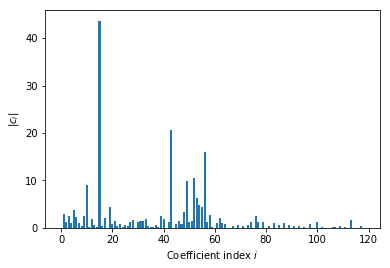

In [41]:
# change lam between 0.02 and 0.34, e.g. 0.34, 0.30, 0.20, 0.13, 0.10, 0.02
lam = 0.2

RMSE_LASSO,coef, selected_features = lasso_fit(lam, P, D, features_list)
plt.bar(range(len(coef)), np.abs(coef))
plt.xlabel("Coefficient index $i$")
plt.ylabel("$|c_i|$")

print("lambda: %.3f\t dimension of descriptor: %s\t RMSE_LASSO: %.3f\t" 
      %(lam, len(selected_features), RMSE_LASSO))
print(pd.DataFrame({'features':np.array(selected_features), 'abs(nonzero_coefs_LASSO)': np.abs(coef[coef.nonzero()])}))    

In [ ]:
#L0

In [42]:
def L0(P, D, dimension):
    n_rows, n_columns = D.shape
    D = np.column_stack((D, np.ones(n_rows)))
    SE_min = np.inner(P ,P)
    coef_min, permu_min = None, None
    for permu in combinations(range(n_columns), dimension):
        D_ls = D[:, permu + (-1,)]
        coef, SE, __1, __2 = np.linalg.lstsq(D_ls, P, rcond=-1)
        try:
            if SE[0] < SE_min: 
                SE_min = SE[0]
                coef_min, permu_min = coef, permu
        except:
            pass
    RMSE = np.sqrt(SE_min/n_rows)
    return RMSE, coef_min, permu_min

In [44]:
features_list = df_D[selected_features].columns.tolist()
D=df_D[selected_features].values
number_of_features = len(features_list)
for dim in range(1,number_of_features):
        RMSE, coefficients, selected_indices = L0(P,D,dim)
        print("n_features: %s; %sD  RMSE: %.3f  best features: %s" 
              %(len(features_list), dim, RMSE, [features_list[i] for i in selected_indices]))

n_features: 104; 1D  RMSE: 28.445  best features: ['Temperature (C)/Metal_T_boiling']
n_features: 104; 2D  RMSE: 27.163  best features: ['DP', 'Temperature (C)']
n_features: 104; 3D  RMSE: 26.487  best features: ['DP', 'Temperature (C)', '(Al2O3+Fe2O3)']


KeyboardInterrupt: 